In [ ]:
# ------------------------
# scikit-learn 설치 
# ------------------------
# !conda install scikit-learn
# !pip install scikit-learn

# 설치 확인
from sklearn.linear_model import LinearRegression


In [ ]:
# ------------------------
# koreanize_matplotlib 설치 
# ------------------------
# !conda install koreanize_matplotlib
# !pip install koreanize_matplotlib

# 설치 확인
import koreanize_matplotlib


# 문제 정의
* 플랫폼 별 광고비 지출에 다른 판매량 분석 및 예측

# 데이터 수집
* https://www.kaggle.com/datasets/ashydv/advertising-dataset


# 패키지 불러오기

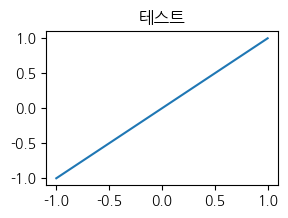

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.figure(figsize=(3,2))
plt.plot([-1,0,1], [-1,0,1])
plt.title('테스트')
pass


# 데이터 불러오기

In [2]:
# ----------------------------------------
# 데이터를 불러와 데이터프레임을 만들고
# 상위 5개 행을 확인합니다.
# ----------------------------------------
df = pd.read_csv('data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 데이터 탐색
* 독립변수와 종속변수를 식별합니다.
* 각 변수의 자료형, 결측치 여부, 통계적 특성을 확인합니다.
* 종속변수와 독립변수의 관계를 중심으로 탐색합니다.

In [3]:
# ----------------------------------------
# 데이터프레임 정보 확인
#   - 자료형, 결측치 여부 확인
# ----------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# ----------------------------------------
# 수치형 데이터 - 요약통계 확인
# ----------------------------------------
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


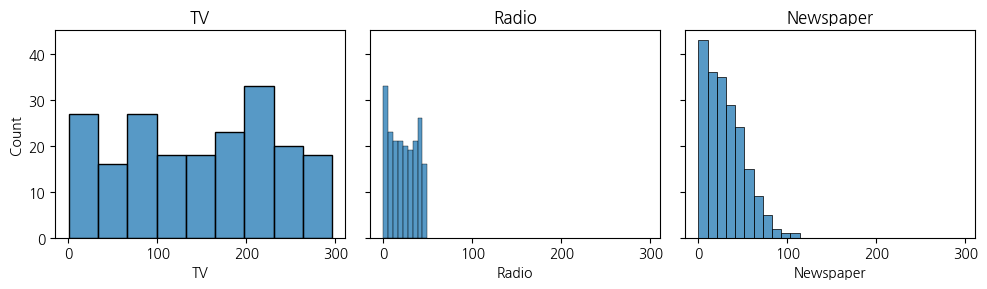

In [5]:
# ----------------------------------------
# 수치형 독립변수의 분포 확인
# ----------------------------------------
fis, ax = plt.subplots(1,3, figsize=(10,3), sharex=True, sharey=True)
sns.histplot(x='TV', data=df, ax=ax[0])
sns.histplot(x='Radio', data=df, ax=ax[1])
sns.histplot(x='Newspaper', data=df, ax=ax[2])

ax[0].set_title('TV')
ax[1].set_title('Radio')
ax[2].set_title('Newspaper')
plt.tight_layout()


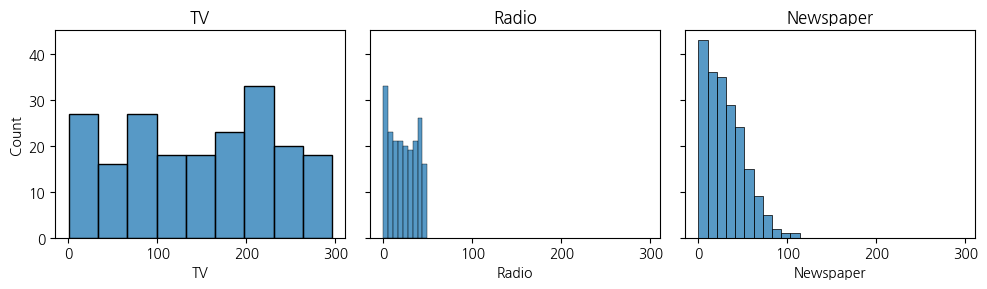

In [6]:
# ----------------------------------------
# 수치형 독립변수의 분포 확인 => 반복문으로 코드 효율화
# ----------------------------------------
fis, ax = plt.subplots(1,3, figsize=(10,3), sharex=True, sharey=True)

for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    sns.histplot(x=feature, data=df, ax=ax[i])
    ax[i].set_title(feature)

plt.tight_layout()


<Axes: >

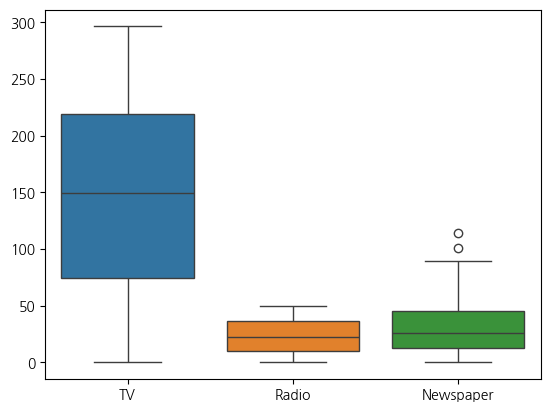

In [12]:
sns.boxplot(df[['TV', 'Radio', 'Newspaper']])

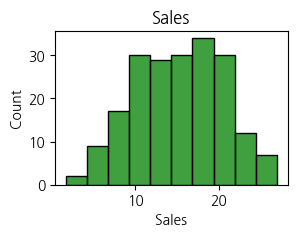

In [8]:
# ----------------------------------------
# 수치형 종속변수의 분포 확인 
# ----------------------------------------
plt.figure(figsize=(3,2))
sns.histplot(x='Sales', data=df, color='green')
plt.title("Sales");

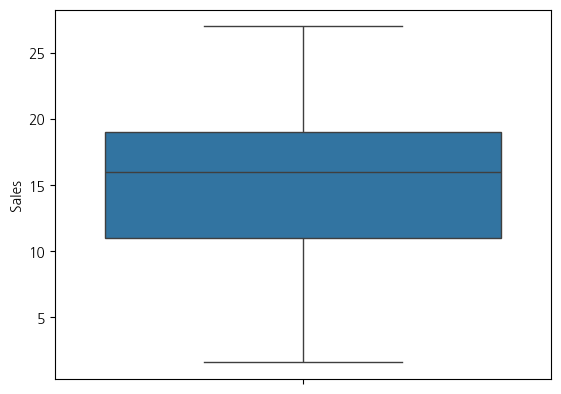

In [15]:
sns.boxplot(y='Sales', data=df);

## 독립변수와 종속변수간의 관계 파악

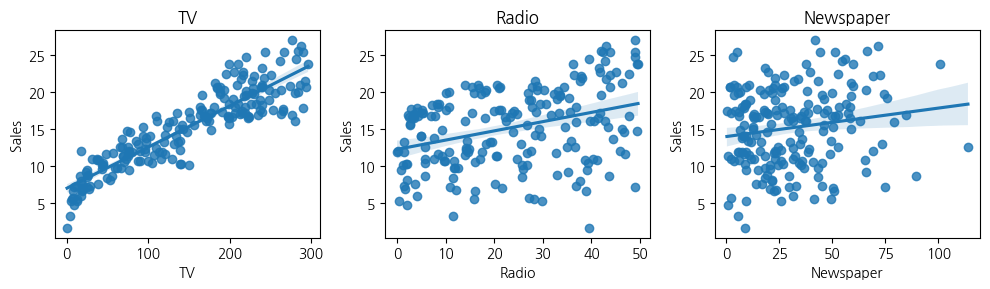

In [9]:
fis, ax = plt.subplots(1,3, figsize=(10,3))

for i, feature in enumerate(['TV', 'Radio', 'Newspaper']):
    sns.regplot(x=feature, y='Sales', data=df, ax=ax[i])
    ax[i].set_title(feature)

plt.tight_layout()

## 상관계수
- 수치형 데이터 간의 상관계수 : 피어슨 상관계수
- 독립변수와 종속변수 간의 상관계수 
- 독립변수 간의 상관계수 -> 다중공선성 확인

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


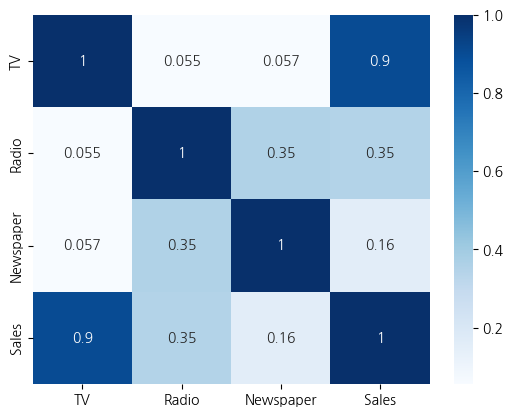

In [11]:
sns.heatmap(df.corr(), cmap='Blues', annot=True);